## Image Classification with CNN

#### Resize Images in the Dataset

In [ ]:
# /home/.../Dataset
# C:\Users\...\Dataset

dataset_directory = input("Enter the data set directory: ")

In [1]:
from PIL import Image
import os, glob  #to access files in a directory

# Pixel sizes.
width = 200
height = 200

# To access directory of the dataset.
dataset = glob.glob(os.path.join(dataset_directory + os.sep + '*'))

# To access all files in the dataset.
for image_file in dataset:

    # To access all images in a file.
    for imagename in glob.glob(os.path.join(image_file + os.sep + '*')):
    
        # Open the image.
        img = Image.open(imagename)

        # Resize it.
        img = img.resize((width, height), Image.BILINEAR)
        
        # Save it back to disk.
        img.save(imagename)

#### Split Images to Train and Test for the Each Category

In [2]:
from random import shuffle  # To randomize images.
import json as simplejson

# To access directory of the dataset.
dataset = glob.glob(os.path.join(dataset_directory + os.sep + '*'))

# To access all files in the dataset.
for image_file in dataset:
    images = []
    # Put accessed all images in the file into a list.
    images = glob.glob(os.path.join(image_file + os.sep + '*'))

    # Shuffle images list.
    shuffle(images)

    # Choose 80% of shuffled images for the train.
    train = (images[0:int(len(images)*0.8)])

    # Choose other 20% of shuffled images for the test.
    test = (images[int(len(images)*0.8):])

    # Create a train file with the name of the data set containing the images.
    filename_train = "train" + os.path.basename(image_file) + ".txt"

    # Save the name of train images into a file.
    f = open(filename_train, 'w')
    simplejson.dump(train, f)
    f.close()

    # Create a test file with the name of the data set containing the images.
    filename_test = "test" + os.path.basename(image_file) + ".txt"

    # Save the name of test images into a file.
    f = open(filename_test, 'w')
    simplejson.dump(test, f)
    f.close()

In [3]:
labels = {"airplanes" :0,"butterfly" :1,"car_side" :2,"cellphone" :3,"cup" :4,"dolphin" :5, 
          "headphone" :6, "laptop" :7, "Motorbikes" :8, "pizza" :9}

#### Combine Splitted Train Images &  Combine Splitted Test Images & Shuffle Images

In [4]:
# To access directory of the dataset.
dataset = glob.glob(os.path.join(dataset_directory + os.sep + '*'))

Xtrain = []
y_train = []

Xtest = []
y_test = []

# To access all files in the dataset.
for image_file in dataset:
    # Put accessed all images in the file into a list.
    images = glob.glob(os.path.join(image_file + os.sep + '*'))

    # Shuffle images list.
    shuffle(images)

    # Choose 80% of shuffled images for the train.
    Xtrain.append(images[0:int(len(images)*0.8)])
    for i in range(0, int(len(images)*0.8)):
        y_train.append(labels[os.path.basename(image_file)])

    # Choose other 20% of shuffled images for the test.
    Xtest.append(images[int(len(images)*0.8):])
    for i in range(0, (int(len(images))-int(len(images)*0.8))):
        y_test.append(labels[os.path.basename(image_file)])

# To reduce 1-dimensional from 2-dimensional.
X_train = []
for i in range(0,len(Xtrain)):
    for j in range(0,len(Xtrain[i])):
        X_train.append(Xtrain[i][j])

# To reduce 1-dimensional from 2-dimensional.
X_test = []
for i in range(0,len(Xtest)):
    for j in range(0,len(Xtest[i])):
        X_test.append(Xtest[i][j])
        
# Create a X_train file for the train images.
filename_train = "X_train" + ".txt"
f = open(filename_train, 'w')
simplejson.dump(X_train, f)
f.close()

# Create a y_train file to hold the outputs of the train images.
filename_output = "y_train" + ".txt"
f = open(filename_output, 'w')
simplejson.dump(y_train, f)
f.close()

# Create a X_test file for the test images.
filename_test = "X_test" + ".txt"
f = open(filename_test, 'w')
simplejson.dump(X_test, f)
f.close()

# Create a y_test file to hold the outputs of the test images.
filename_output = "y_test" + ".txt"
f = open(filename_output, 'w')
simplejson.dump(y_test, f)
f.close()

#### Load the Images 

In [5]:
import cv2
import numpy as np
def load_training_data():
    train_data = []
    images = []
    for i in range(0,len(X_train)):
        label = y_train[i]
        img = cv2.imread(X_train[i])
        img = cv2.resize(img,(200,200),3)
        images.append(img)
        train_data.append([np.array(img), label])
    images = np.array(images)
    print images.shape
    shuffle(train_data)
    return images

In [6]:
def load_test_data():
    train_data = []
    imagesTest = []
    for i in range(0,len(X_test)):
        img = cv2.imread(X_test[i])
        imagesTest.append(img)
    imageTest = np.array(imagesTest)
    return imageTest

#### Evaluate the Model 

In [15]:
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
import keras
import cv2

model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape = (200, 200, 3)))
model.add(layers.MaxPooling2D(pool_size=(2,2),data_format="channels_last"))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu',data_format="channels_last"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())

model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(10, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

images = load_training_data()
imagesTest = load_test_data()

images = images.astype('float32')
images = images / 255.0

imagesTest = imagesTest.astype('float32')
imagesTest = imagesTest / 255.0

Y = to_categorical(y_train)
test_output = to_categorical(y_test)
model.fit(images,Y, validation_data=(imagesTest, test_output),batch_size = 32, epochs = 10)

scores = model.evaluate(imagesTest, test_output, verbose=0)

(1731, 200, 200, 3)
Train on 1731 samples, validate on 438 samples
Epoch 1/10
1731/1731 [==============================] - 47s 27ms/step - loss: 0.8535 - acc: 0.7464 - val_loss: 0.5558 - val_acc: 0.8516
Epoch 2/10
1731/1731 [==============================] - 45s 26ms/step - loss: 0.3500 - acc: 0.8925 - val_loss: 0.4202 - val_acc: 0.8630
Epoch 3/10
1731/1731 [==============================] - 43s 25ms/step - loss: 0.2058 - acc: 0.9359 - val_loss: 0.2857 - val_acc: 0.9064
Epoch 4/10
1731/1731 [==============================] - 43s 25ms/step - loss: 0.1079 - acc: 0.9711 - val_loss: 0.2821 - val_acc: 0.9178
Epoch 5/10
1731/1731 [==============================] - 43s 25ms/step - loss: 0.0574 - acc: 0.9867 - val_loss: 0.2654 - val_acc: 0.9201
Epoch 6/10
1731/1731 [==============================] - 43s 25ms/step - loss: 0.0380 - acc: 0.9896 - val_loss: 0.2355 - val_acc: 0.9224
Epoch 7/10
1731/1731 [==============================] - 43s 25ms/step - loss: 0.0881 - acc: 0.9723 - val_loss: 0.2361

In [16]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 99, 99, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 46, 46, 64)        36928     
__________

In [17]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 95.21%


#### Predict from Model for The Images

Predicted = [2.5572598e-03 1.3454181e-02 6.0686943e-05 9.5105571e-01 1.8174539e-03
 8.8707038e-04 6.7840789e-05 2.4435995e-04 3.0259397e-03 2.6829626e-02]


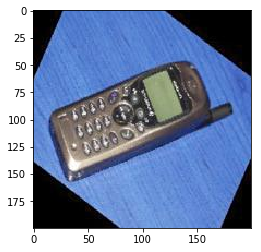


The given image belongs to 'cellphone' data set.


In [86]:
from matplotlib import pyplot
from scipy.misc import toimage
import numpy as np

# /home/esin/Desktop/Dataset/cellphone/image_0002.jpg
# C:\Users\asus\Desktop\Görüntü İşleme Proje\Dataset\cellphone\image_0002.jpg
path = input("Enter the image directory: ")
image = cv2.imread(path)

sample = []
sample.append(image)
sample = np.array(sample).reshape(-1,200,200,3)
sample = sample.astype('float32')
sample = sample / 255.0
Xnew = sample

# Make a prediction
ynew = model.predict(Xnew)

# Show the output possibilities for the prediction.
print("Predicted = %s" % (ynew[0]))

# Get the maximum probabiliy.
max_probability = 0
for i in range(0,len(ynew[0])):
    if(ynew[0][i] > max_probability):
        max_probability = ynew[0][i]
        predicted_label = i
        
for k, v in labels.iteritems():
    if v == predicted_label:
        key = k

pyplot.imshow(image)
pyplot.show()

# Print the predicted label for the image according to maximum probability.
print("\nThe given image belongs to '%s' data set."%(key))